In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
filename = 'cars.csv'

In [21]:
dataset = pd.read_csv(filename)
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [22]:
X = dataset.iloc[:,:-1].values
X = pd.DataFrame(X)

In [5]:
X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']
X = X.infer_objects() 

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6   year          261 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 14.4+ KB


In [7]:
# X = X.convert_objects(convert_numeric=True)
X = X.apply(pd.to_numeric, errors='coerce')

In [8]:
# Eliminating null values
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))

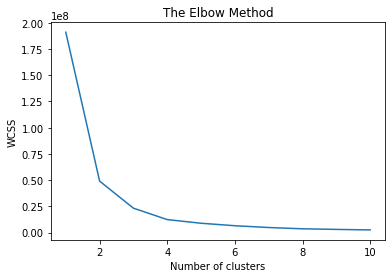

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.to_numpy()

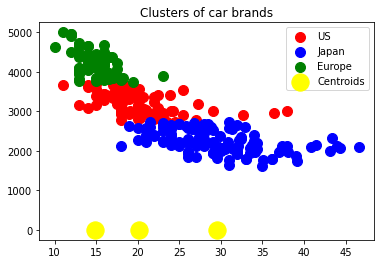

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,4],s=100,c='red',label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,4],s=100,c='blue',label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,4],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

In [12]:
import scipy.cluster.hierarchy as sch

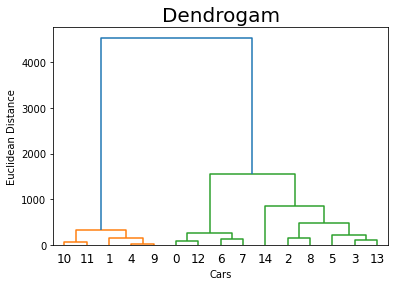

In [13]:
dendogram = sch.dendrogram(sch.linkage(X[:15,:],method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Cars')
plt.ylabel('Euclidean Distance')
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0,
       2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       2, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0,
       2, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 1,
       0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2,
       2, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1,
       0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 0])

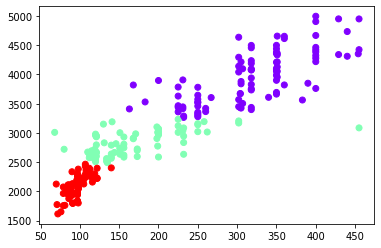

In [15]:
plt.scatter(X[:,2],X[:,4], c=cluster.labels_, cmap='rainbow')